In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor



from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

#### Read the Data


In [74]:
df = pd.read_csv("C:/Users/mohin/Downloads/CarPrice_Assignment.csv")

In [75]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [76]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [77]:
df.shape

(205, 26)

In [78]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### check for missing Values

In [80]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [81]:
### cheching categorical Variables
df.select_dtypes(include="object").head()

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [82]:
# checking Numerical Variables
df.select_dtypes(include=["int","float"]).head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


#### EDA on Data

In [85]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)

# Now we can drop the CarName Feature.
df.drop(columns=["CarName"],inplace=True)

In [87]:
#df.head()

In [88]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

###### Replacing the misspell Words

In [89]:
def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

In [90]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

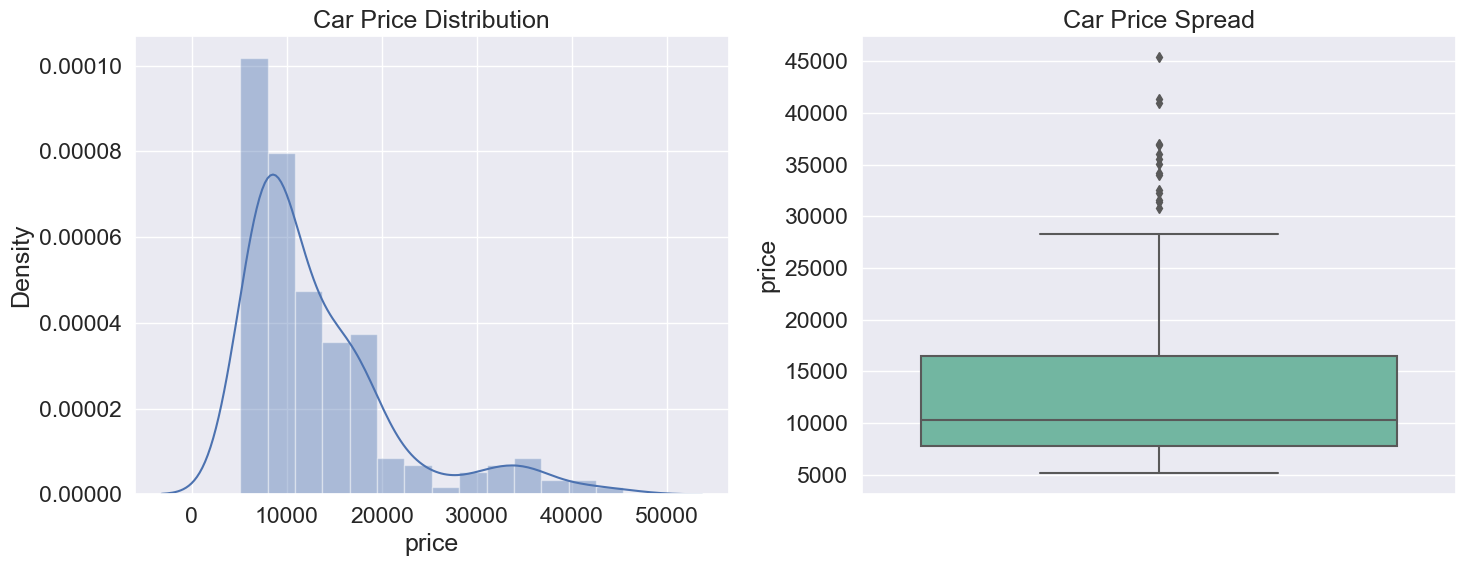

In [92]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"])
plt.title("Car Price Distribution")

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread")
plt.tight_layout()
plt.show()

In [93]:
df["price"].agg(["min","mean","median","max","std","skew"]).to_frame()

,price
min,5118.000000
mean,13276.710571
median,10295.000000
max,45400.000000
std,7988.852332
skew,1.777678


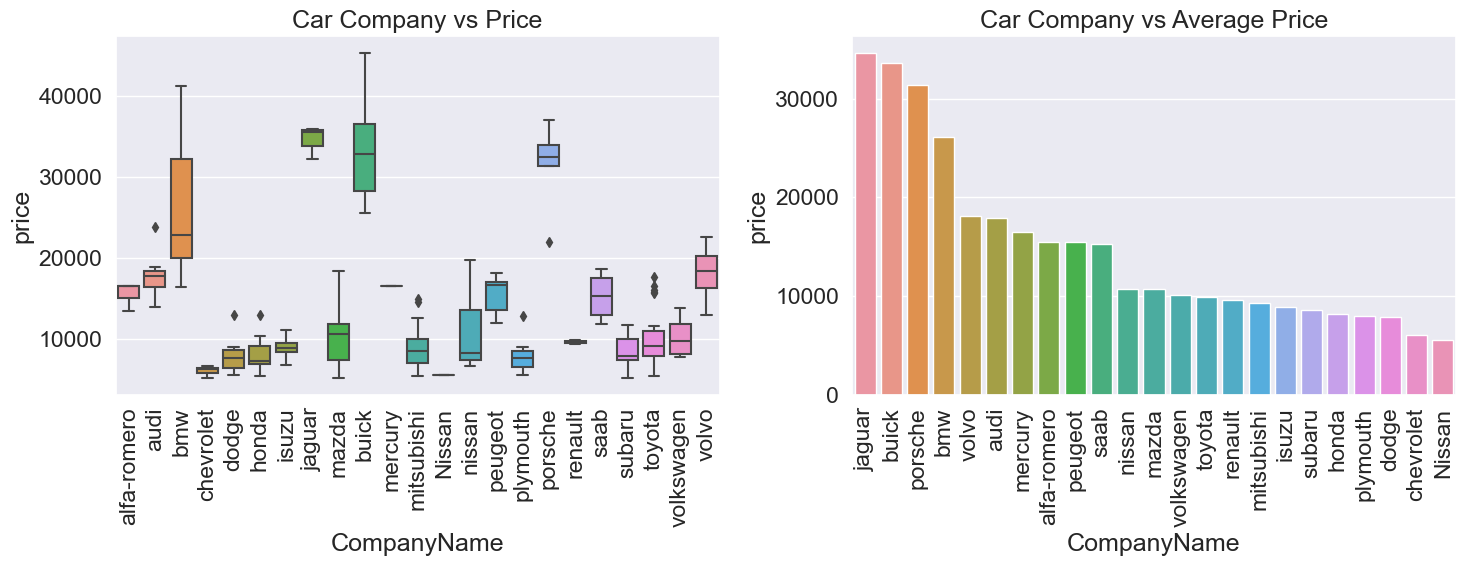

In [96]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x="CompanyName",y="price",data=df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price")

plt.subplot(1,2,2)
x = pd.DataFrame(df.groupby("CompanyName")["price"].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price")
plt.tight_layout()
plt.show()

In [97]:
### coverting above code into function

In [100]:
def categorical_visualization(cols):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.countplot(x=cols,data=df,order=df[cols].value_counts().index)
    plt.xticks(rotation=90)

    plt.subplot(1,3,2)
    sns.boxplot(x=cols,y="price",data=df)
    plt.xticks(rotation=90)
    
    plt.subplot(1,3,3)
    x=pd.DataFrame(df.groupby(cols)["price"].mean().sort_values(ascending=False))
    sns.barplot(x=x.index,y="price",data=x)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


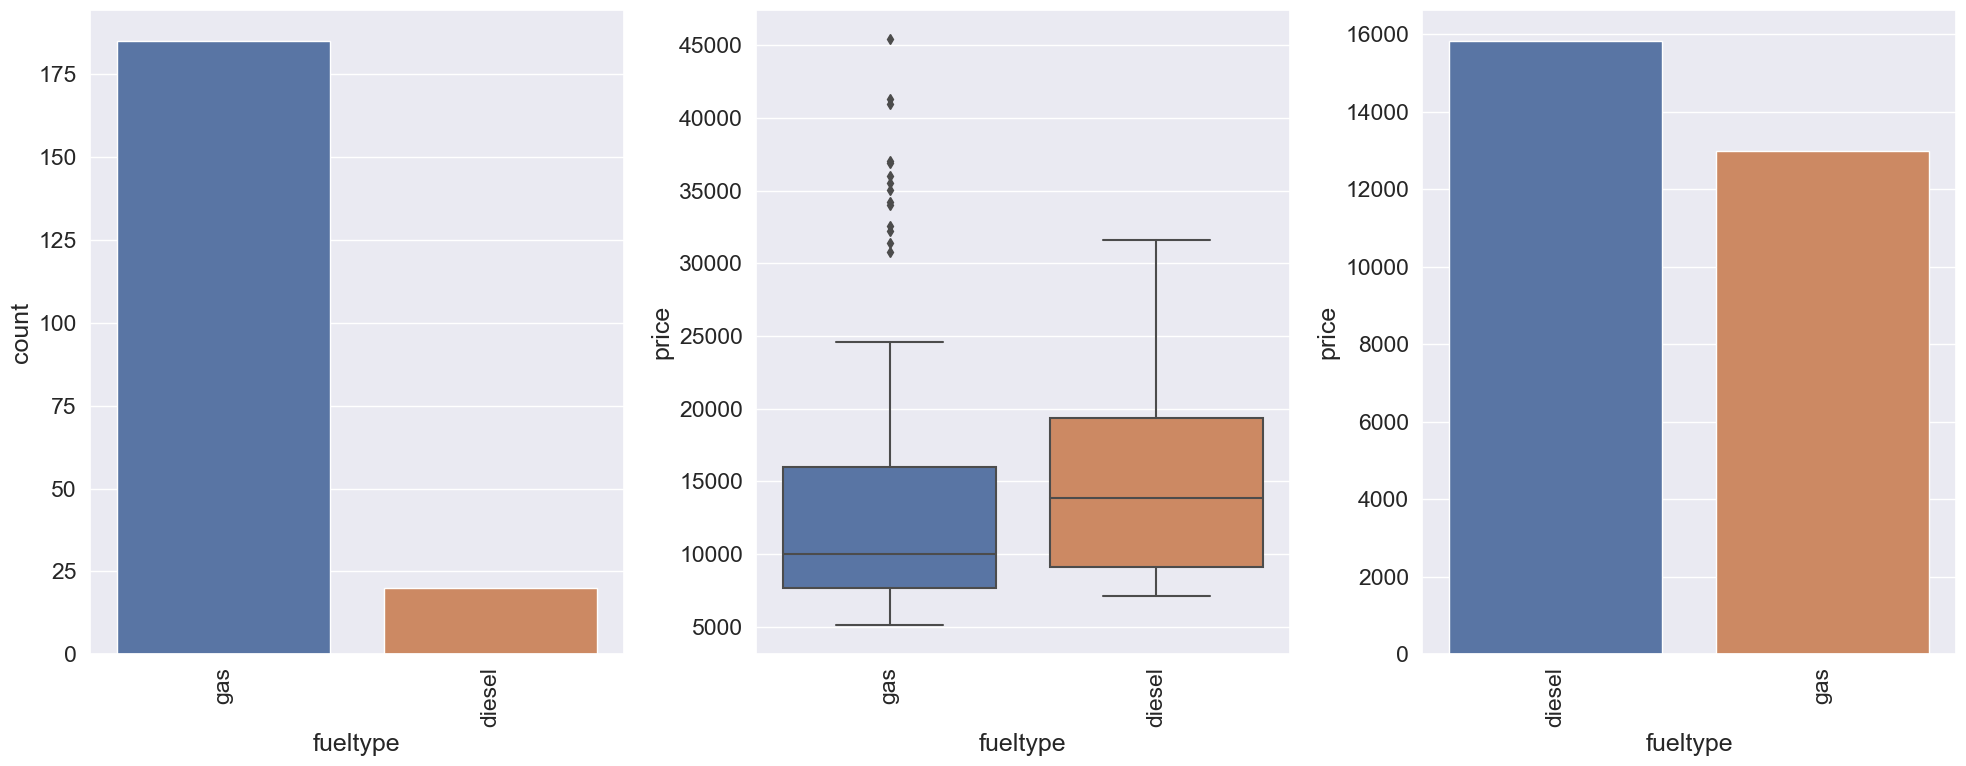

In [101]:
categorical_visualization("fueltype")

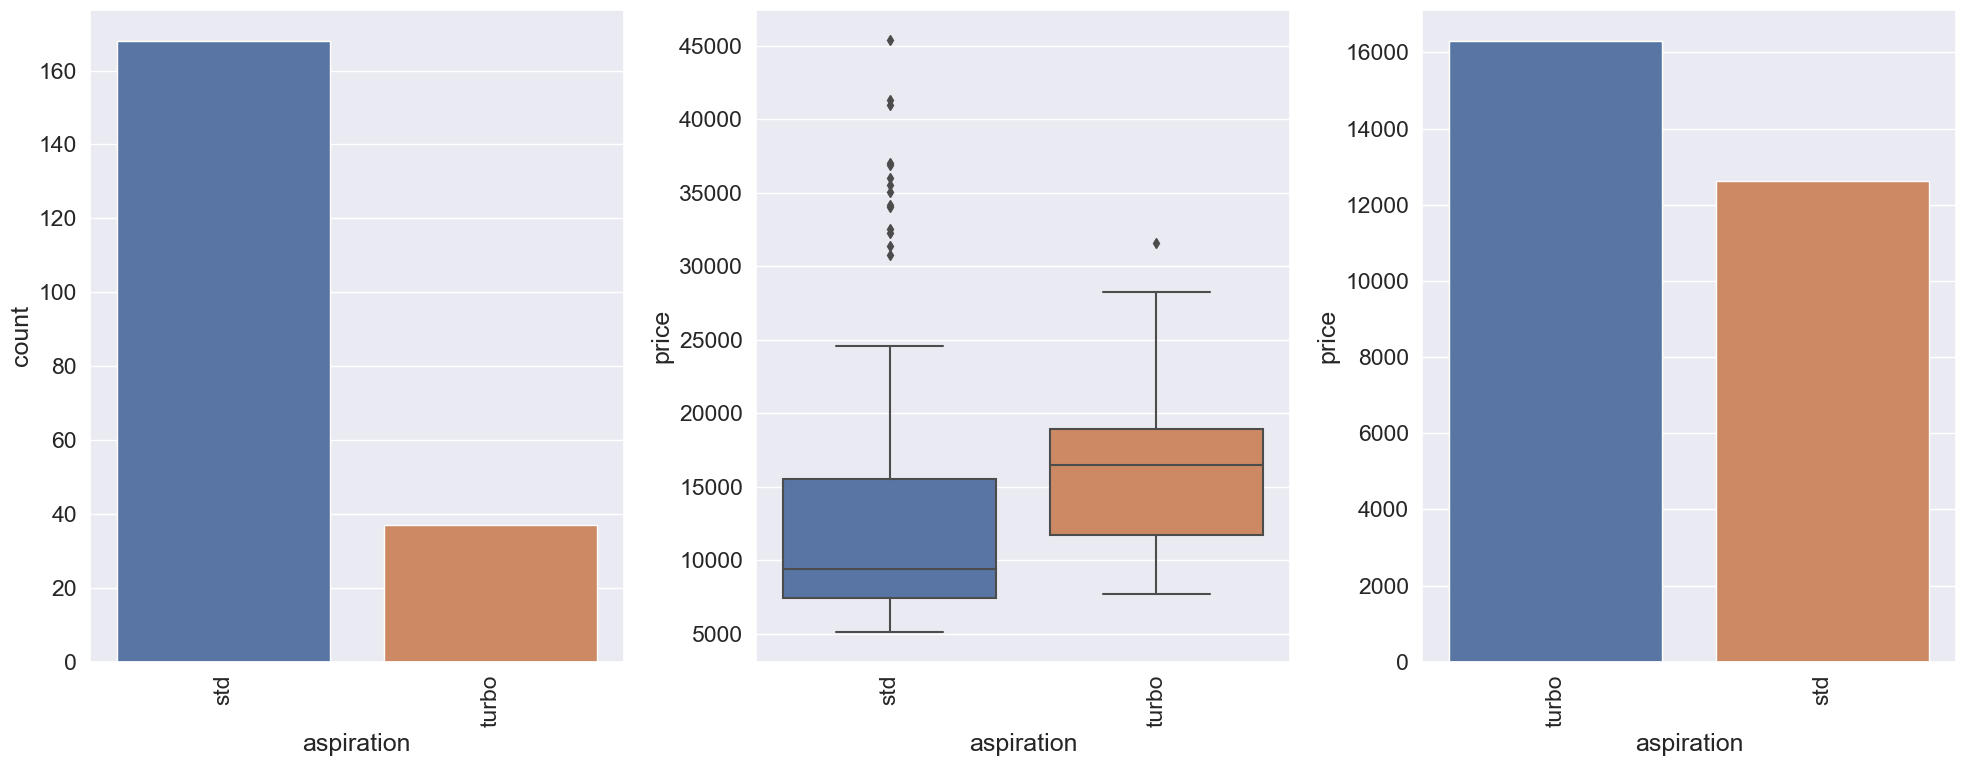

In [102]:
categorical_visualization("aspiration")

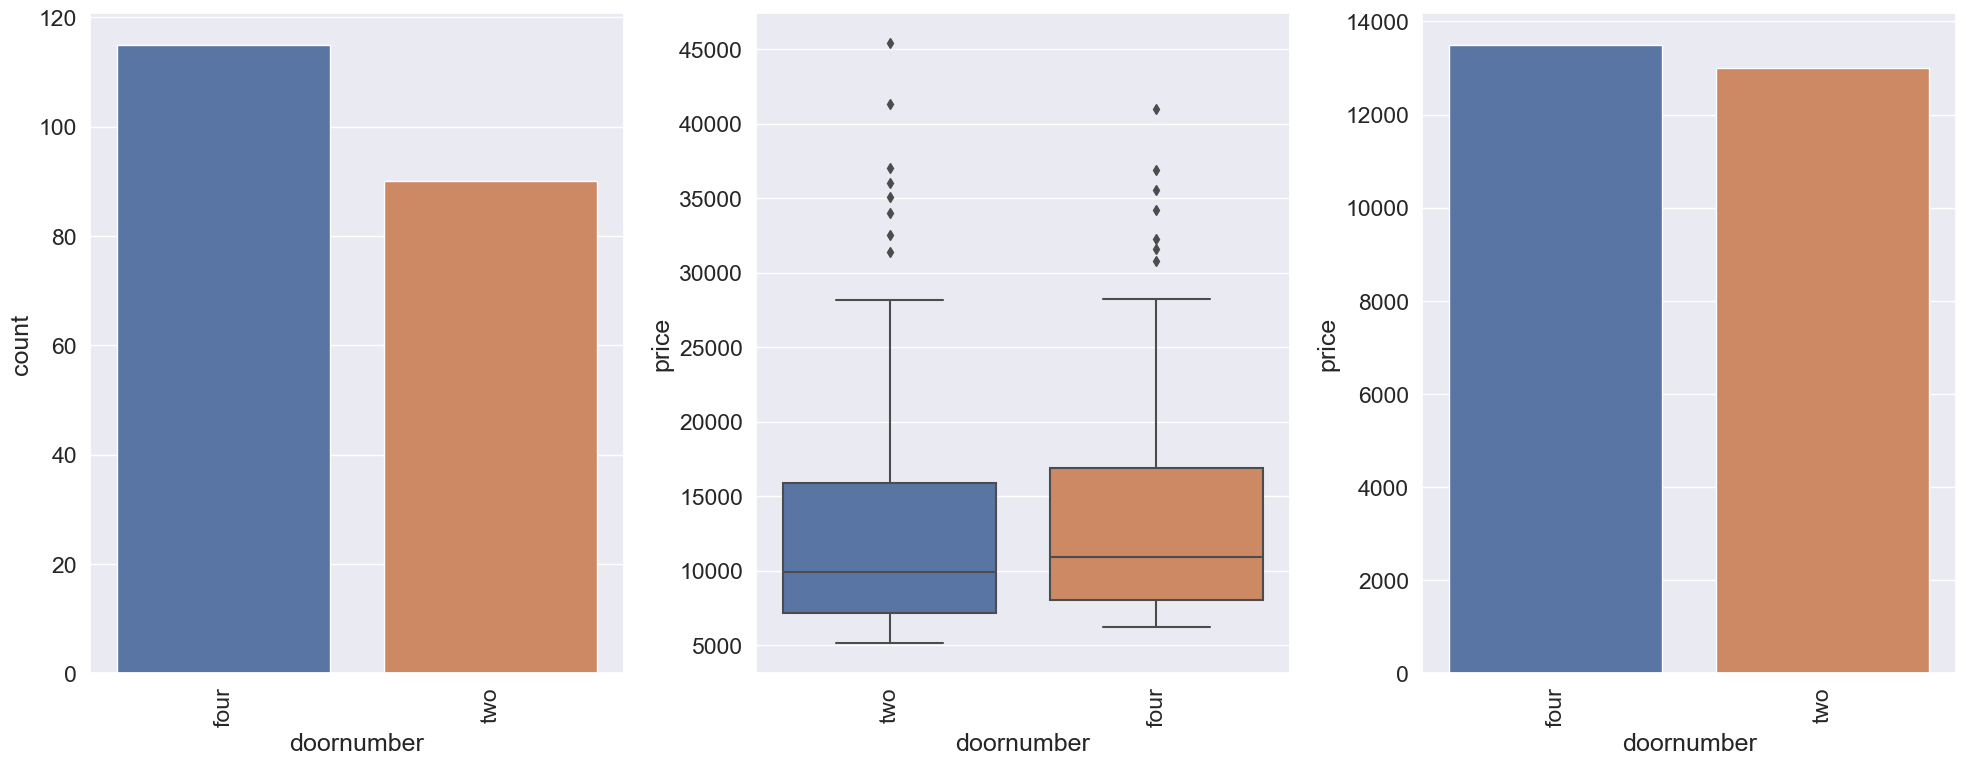

In [103]:
categorical_visualization("doornumber")

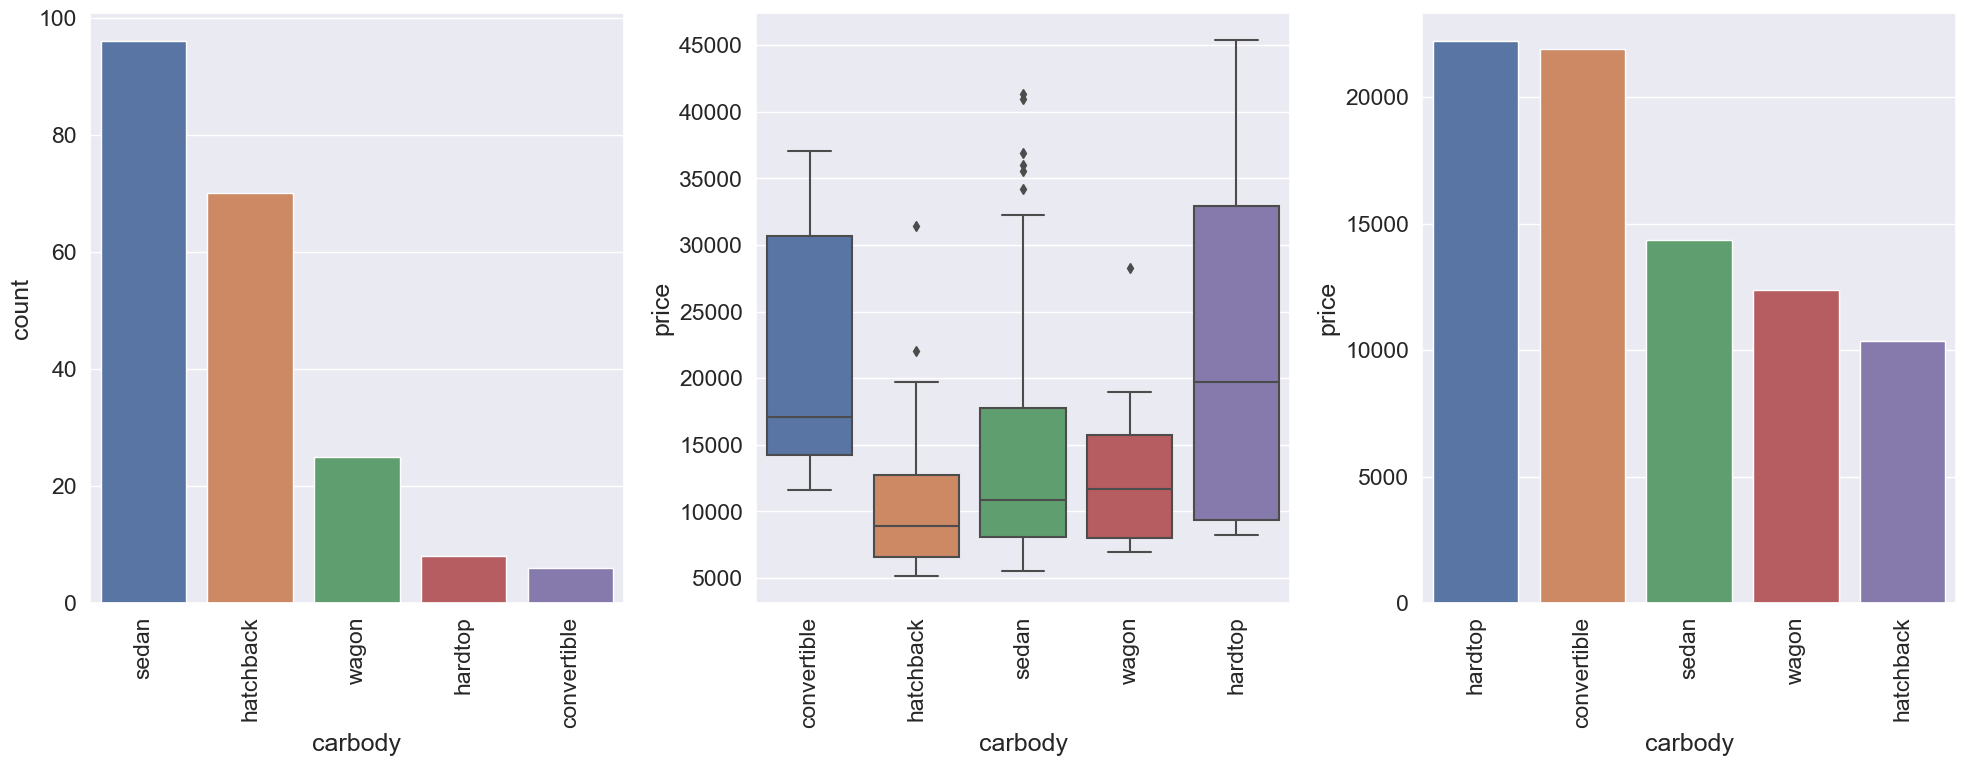

In [104]:
categorical_visualization("carbody")


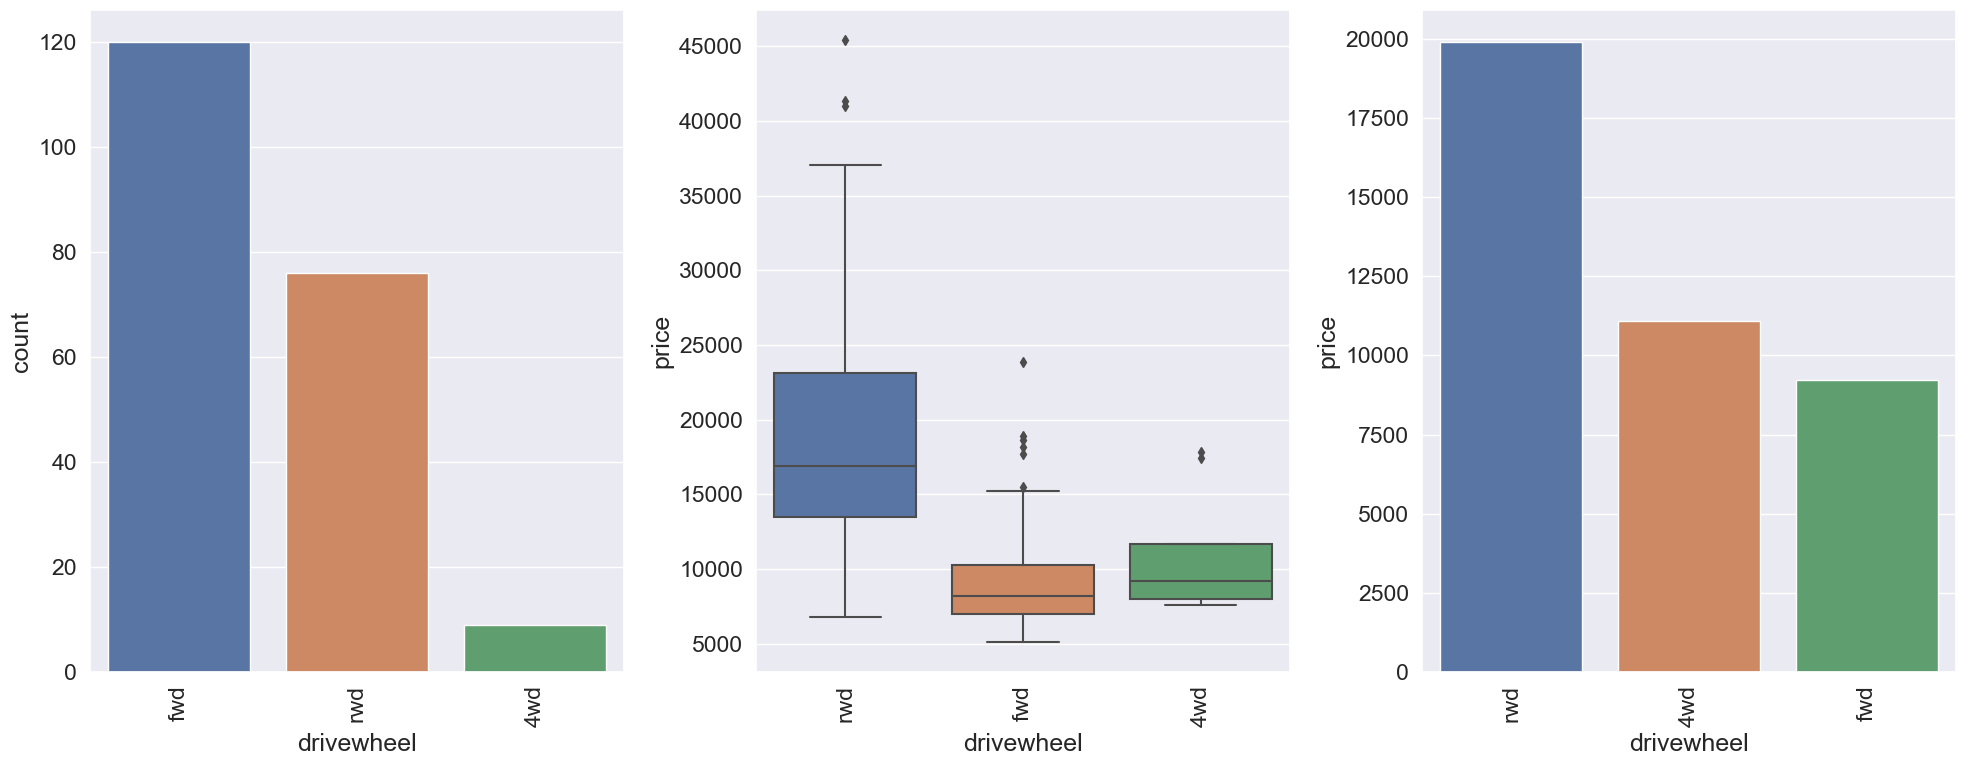

In [105]:
categorical_visualization("drivewheel")

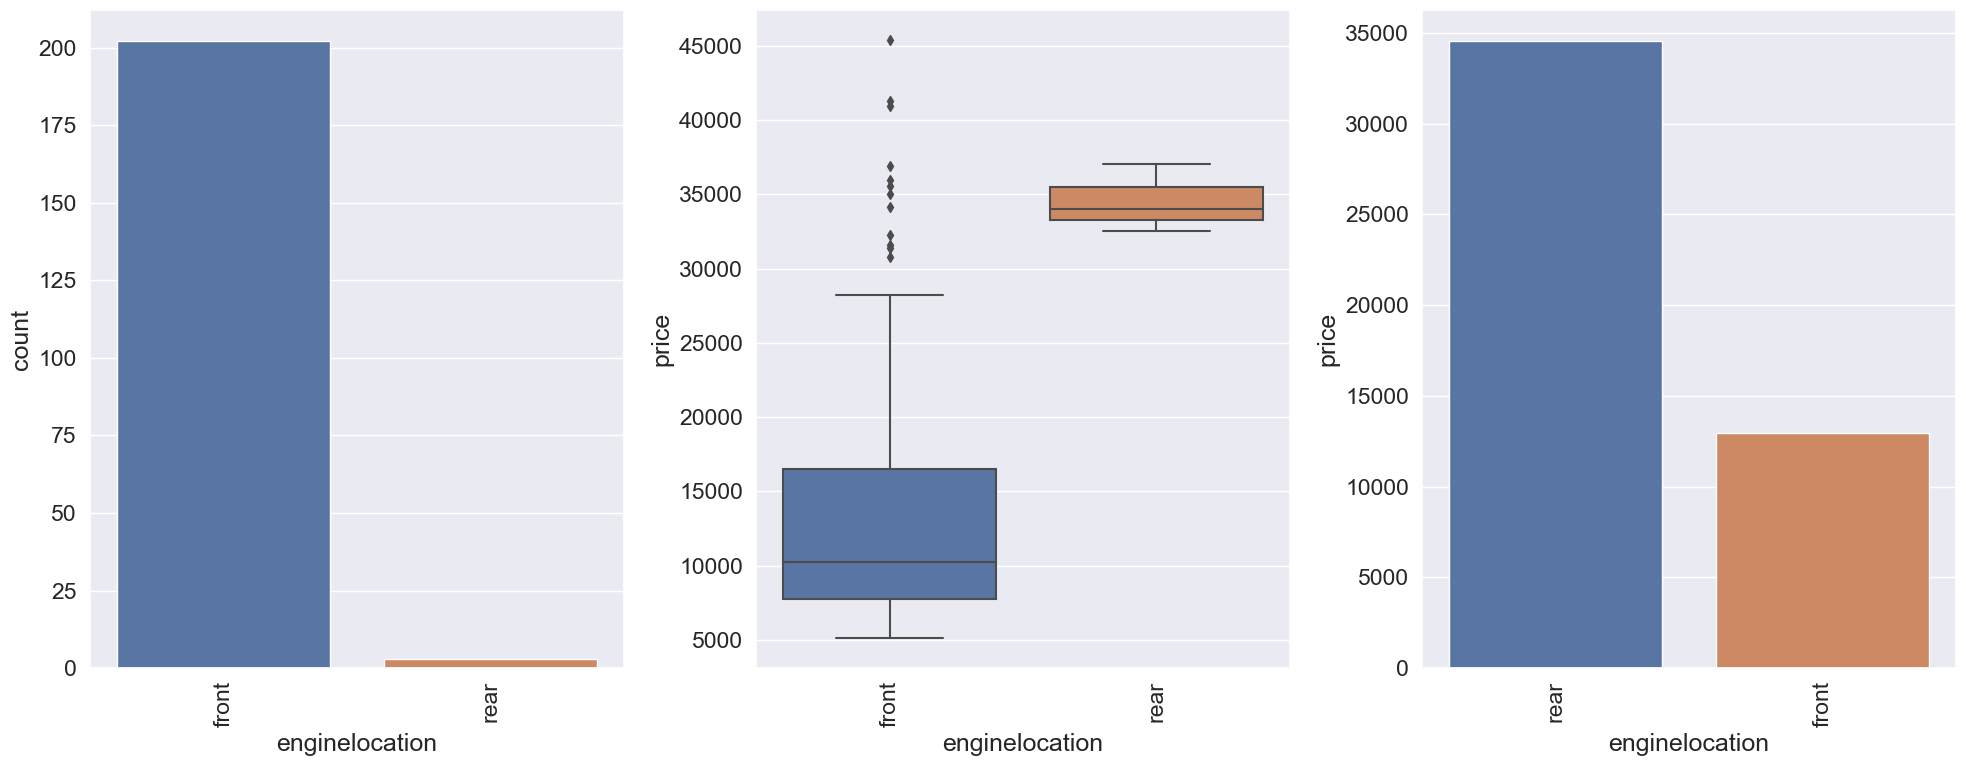

In [106]:
categorical_visualization("enginelocation")

In [107]:
df[df["enginelocation"]=="rear"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,127,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,128,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,129,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


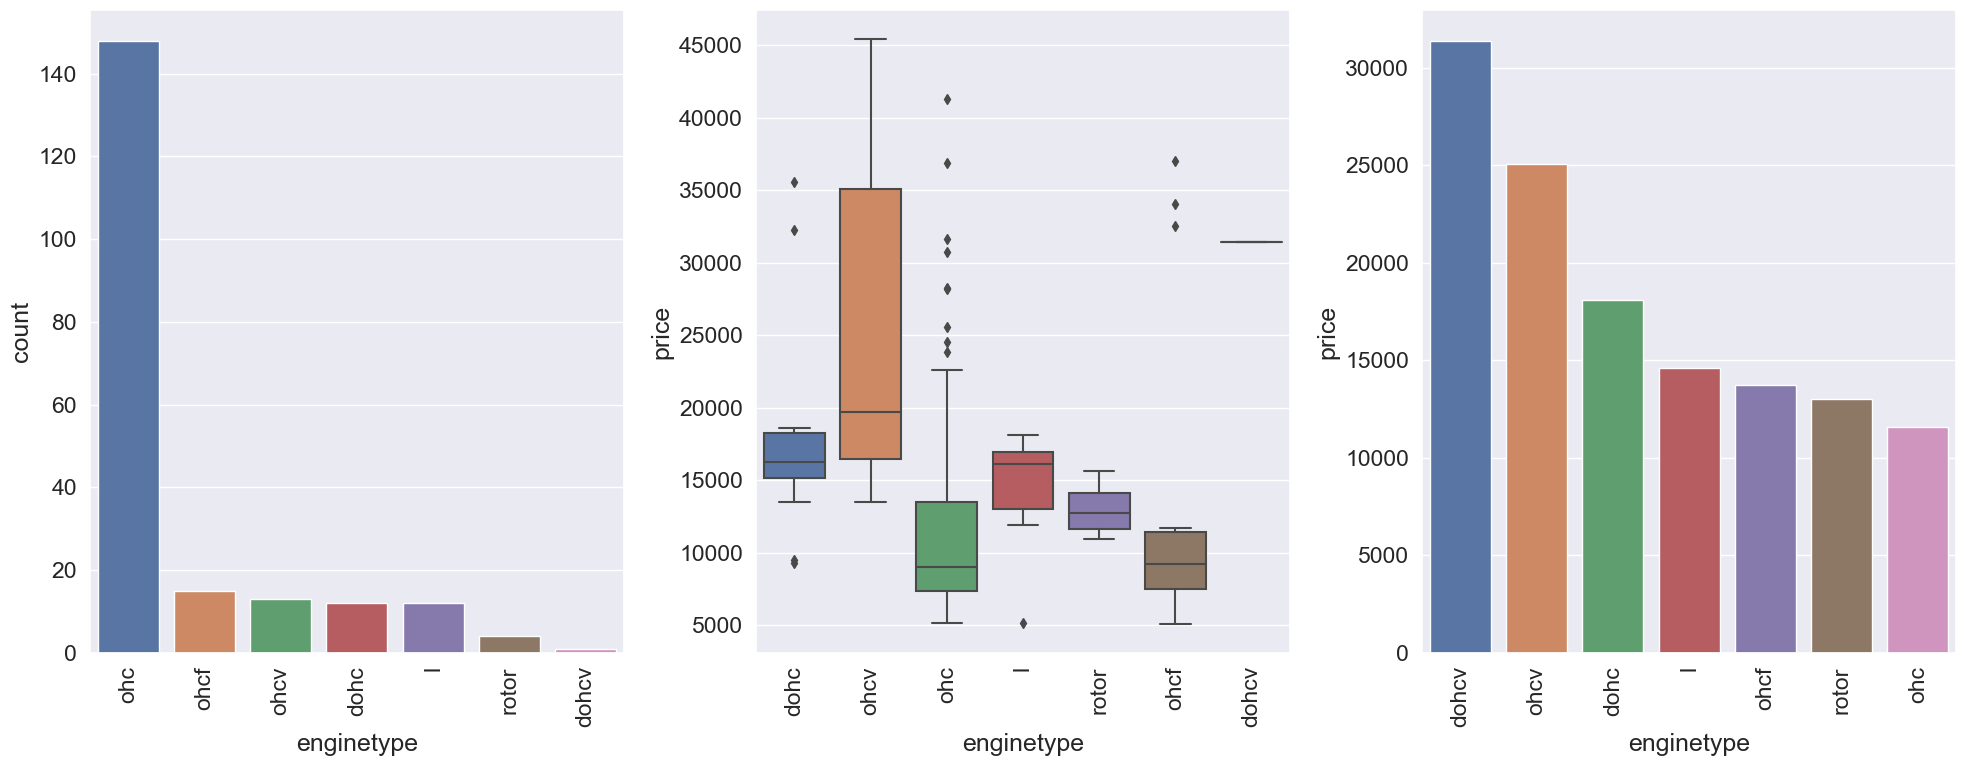

In [108]:
categorical_visualization("enginetype")

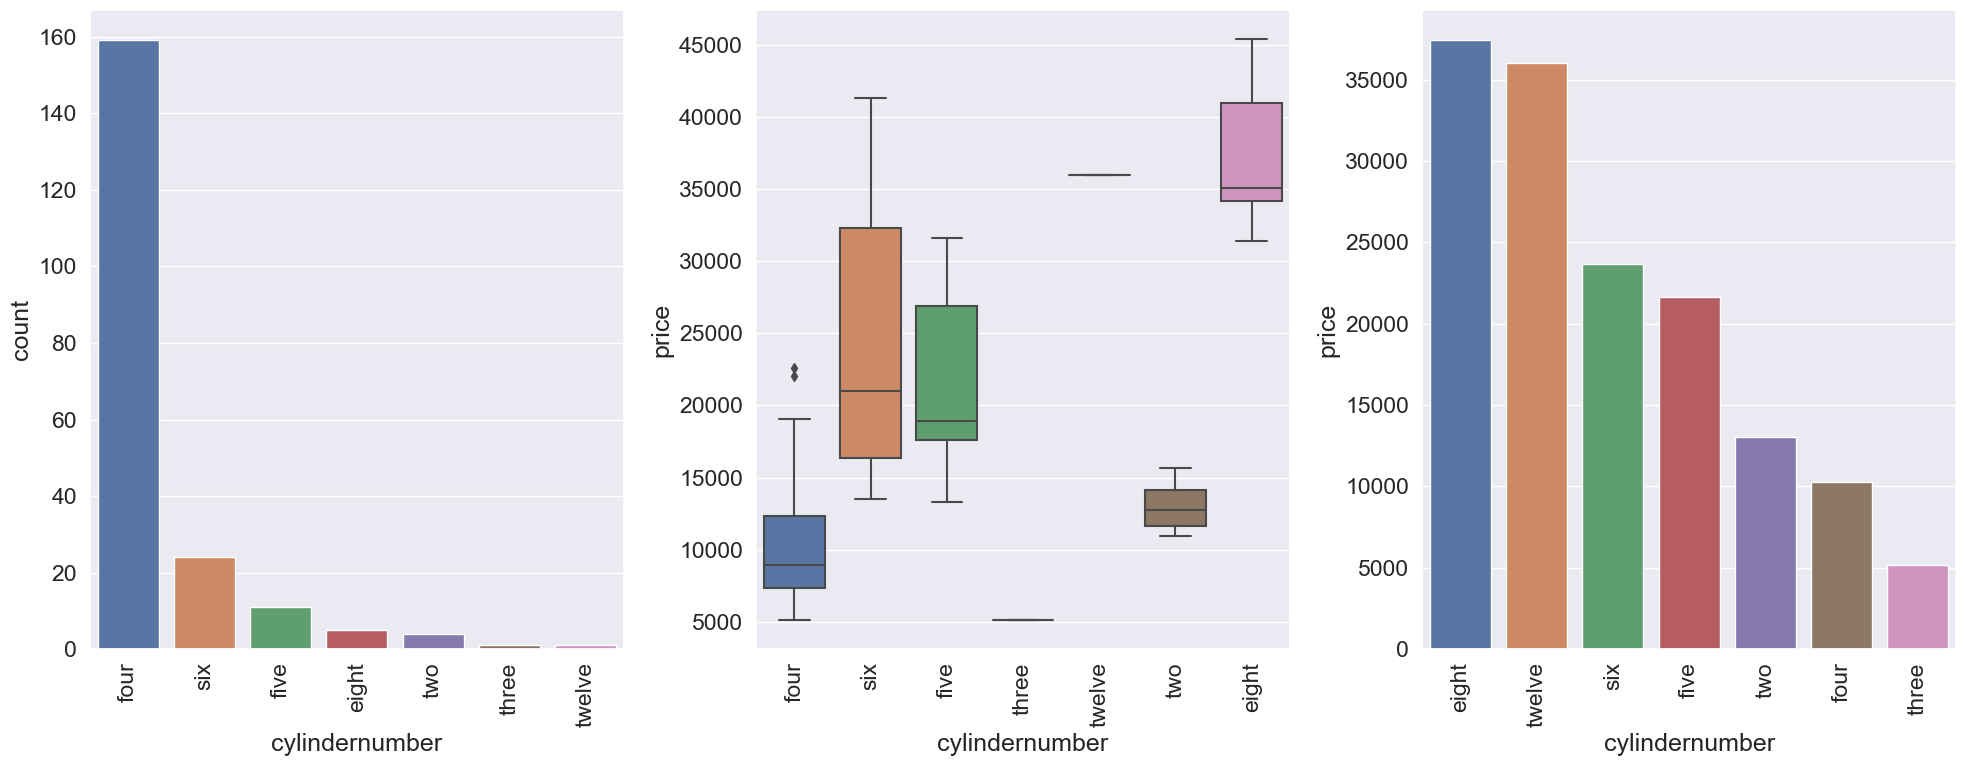

In [109]:
categorical_visualization("cylindernumber")

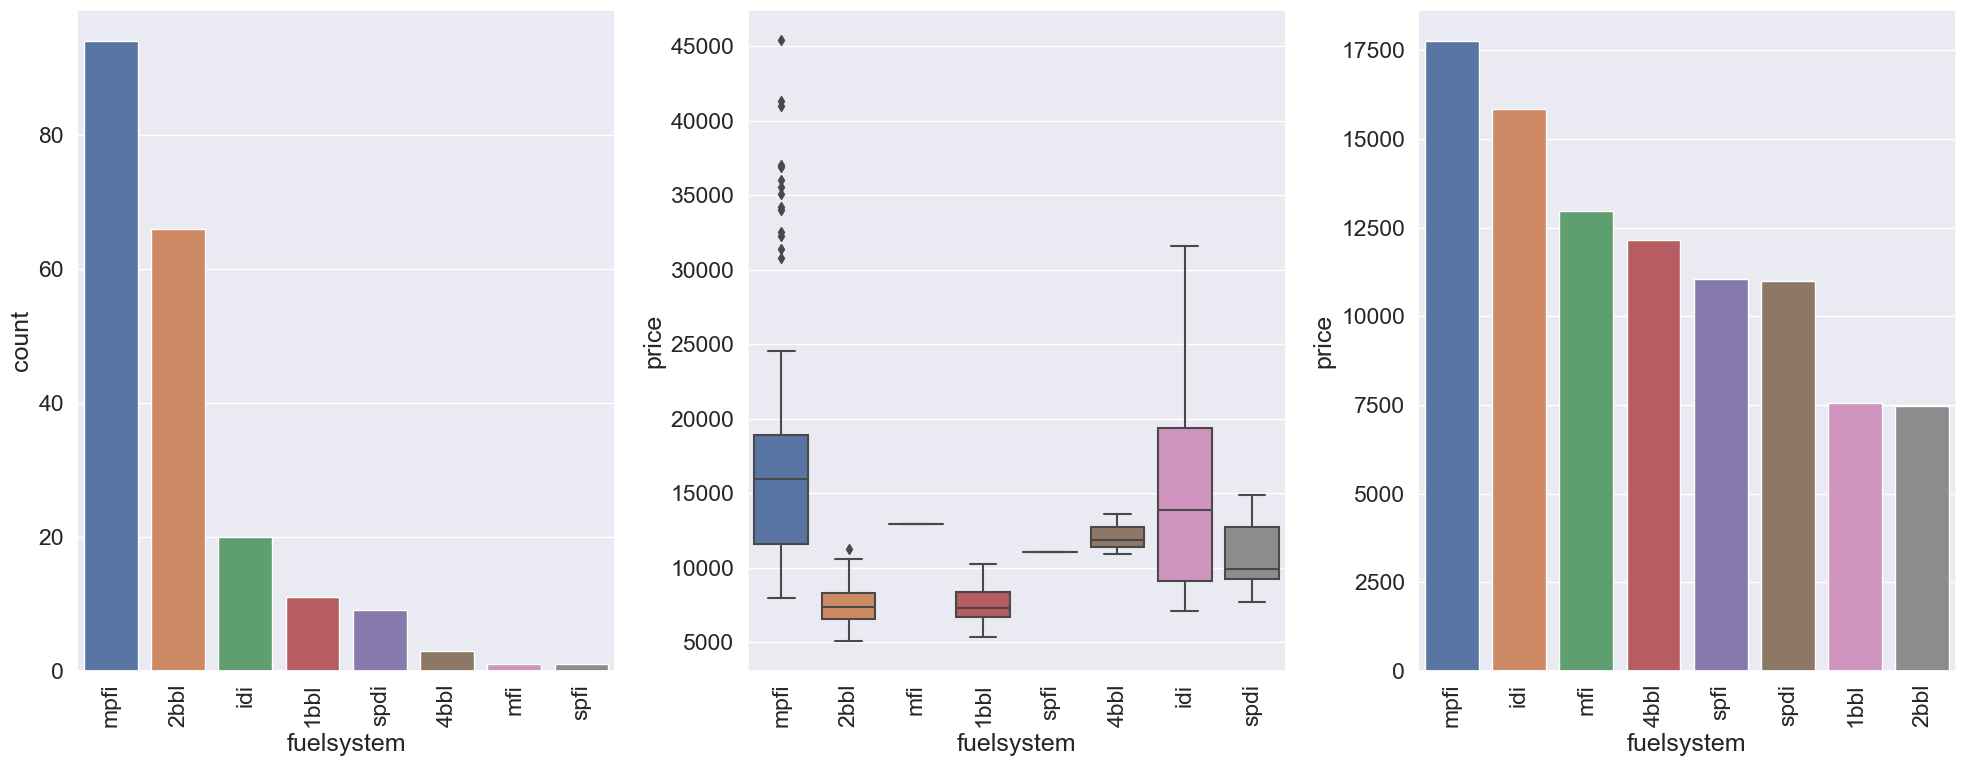

In [110]:
categorical_visualization("fuelsystem")

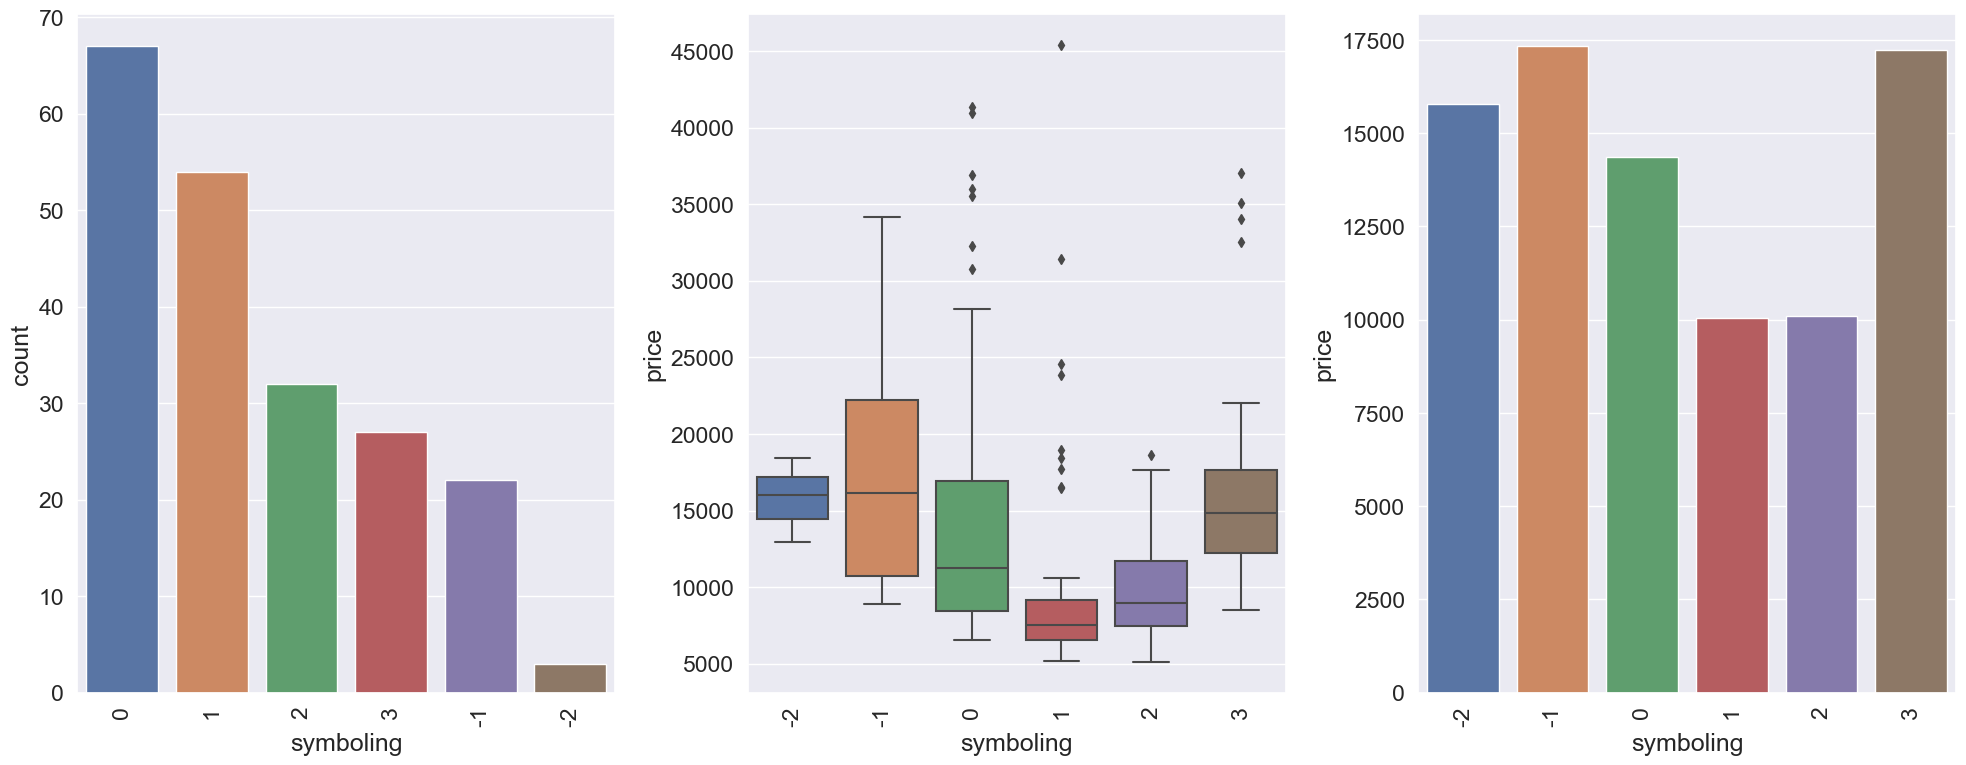

In [111]:
categorical_visualization("symboling")

In [112]:
#### plotting for numerical Data
def scatter_plot(cols):
    x=1
    plt.figure(figsize=(15,6))
    for col in cols:
        plt.subplot(1,3,x)
        sns.scatterplot(x=col,y="price",data=df)
        plt.tight_layout()
        x+=1

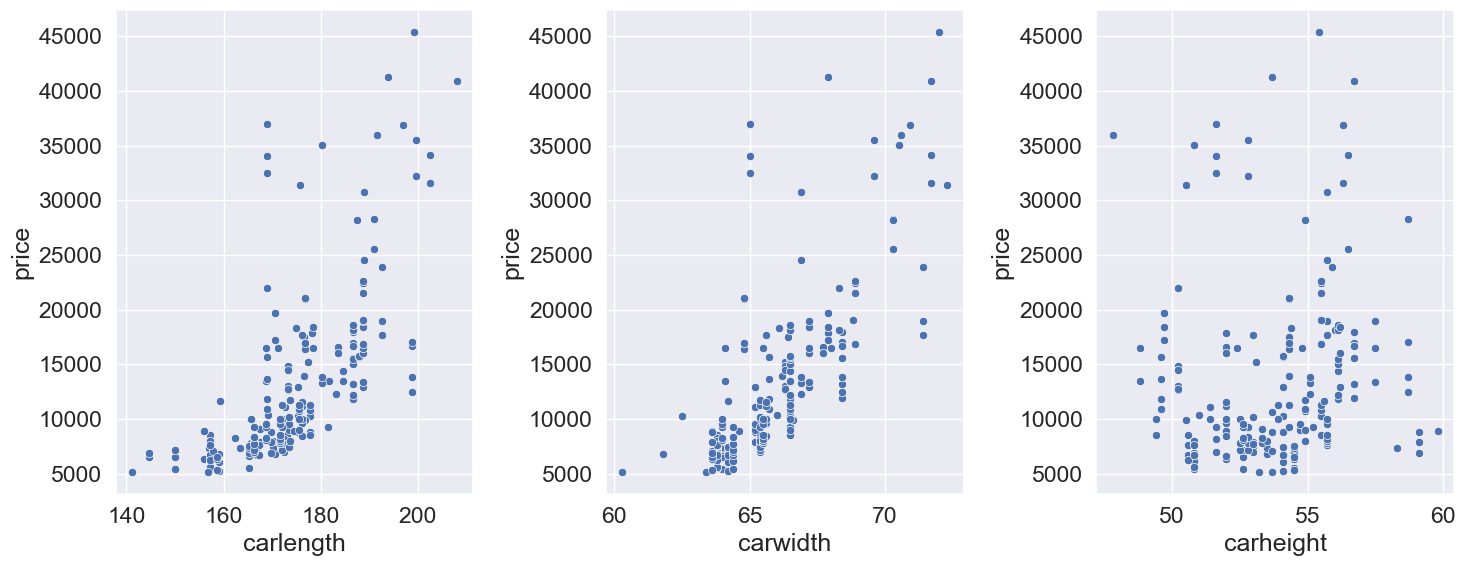

In [113]:
scatter_plot(["carlength","carwidth","carheight"])


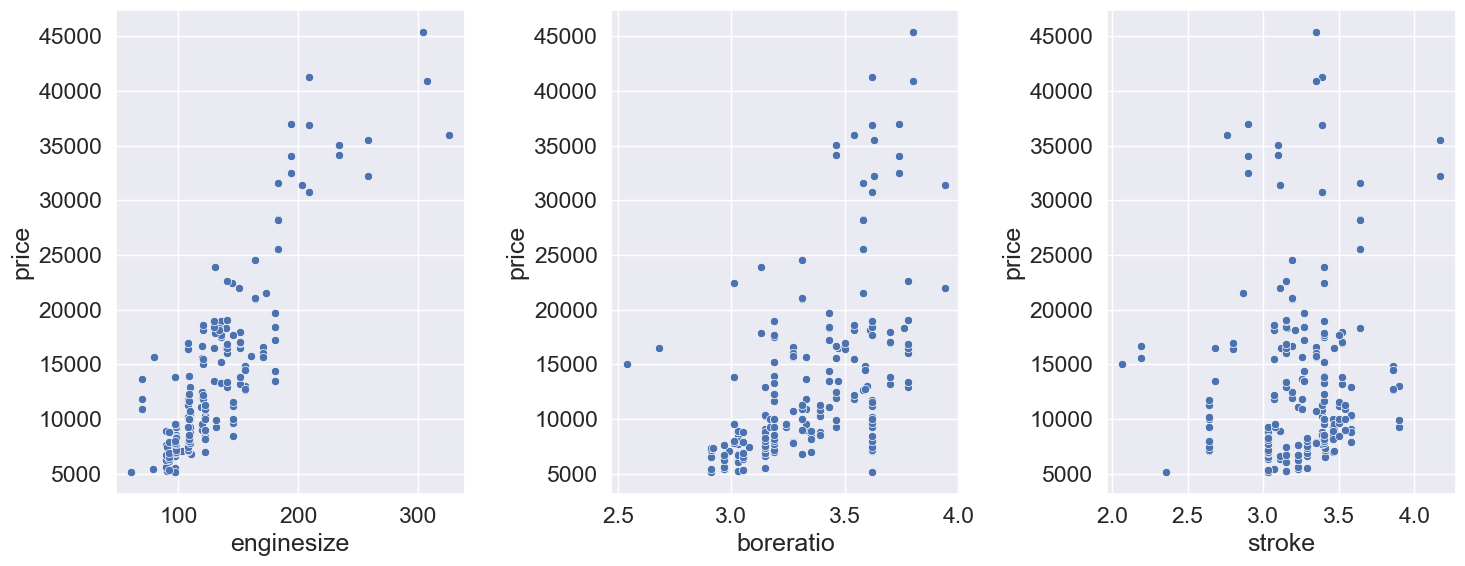

In [114]:
scatter_plot(["enginesize","boreratio","stroke"])

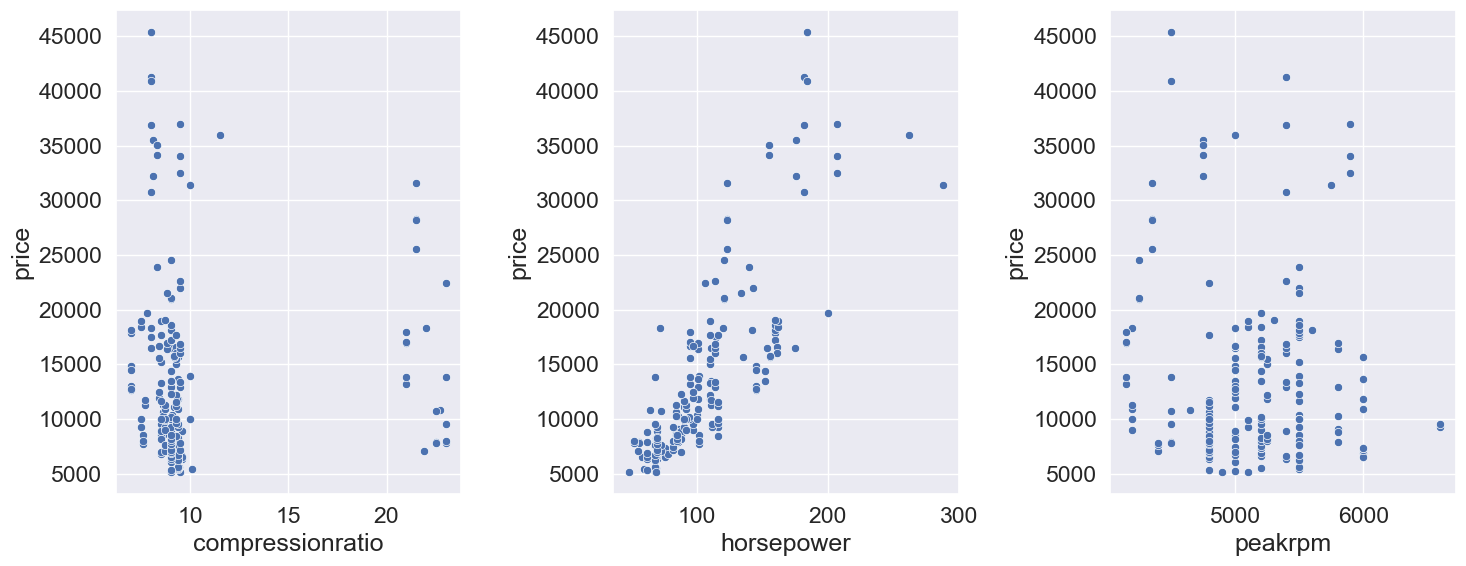

In [115]:
scatter_plot(["compressionratio","horsepower","peakrpm"])

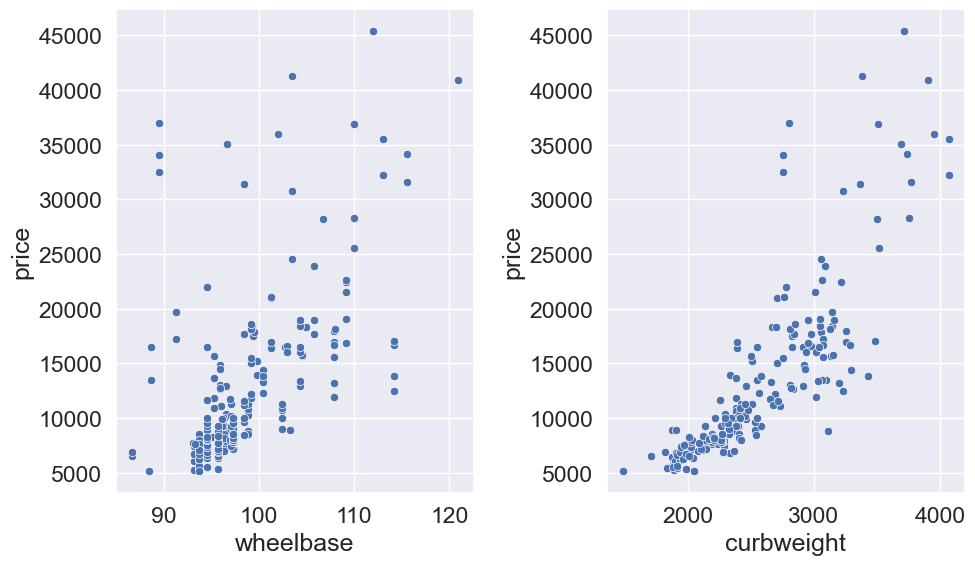

In [116]:
scatter_plot(["wheelbase","curbweight"])

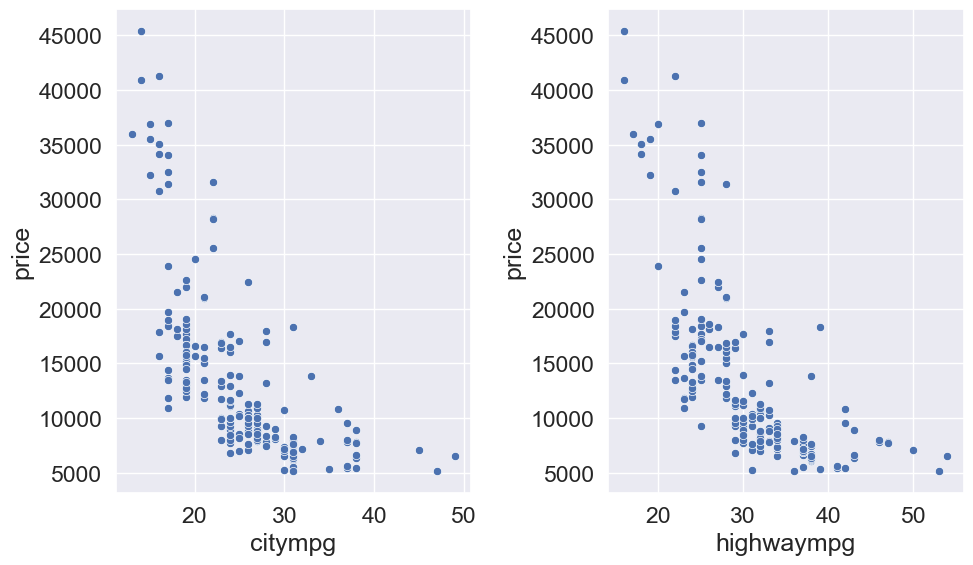

In [117]:
scatter_plot(["citympg","highwaympg"])

##### From above EDA all usefull features are 
CompanyName
Fuel Type
Aspiration
Door Number
Car Body
Drive Wheel
Engine Type
Cyclinder Number
Fuel System
Wheelbase
Carlength
Carwidth
Curbeweight
Enginesize
Boreratio
Horsepower
citympg
Highwaympg
Price

In [119]:
## prices mean corresponding to companies helps in creating the car ranges
company_prices_mean = round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
df = df.merge(company_prices_mean.T,how="left",on="CompanyName")

In [120]:
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
df['CarsRange'] = pd.cut(df['mean'],bins,right=False,labels=cars_bin)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mean,CarsRange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.33,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.33,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,15498.33,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,17859.17,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,17859.17,Medium


In [121]:
df['CarsRange'].value_counts()

Budget     96
Medium     85
Highend    24
Name: CarsRange, dtype: int64

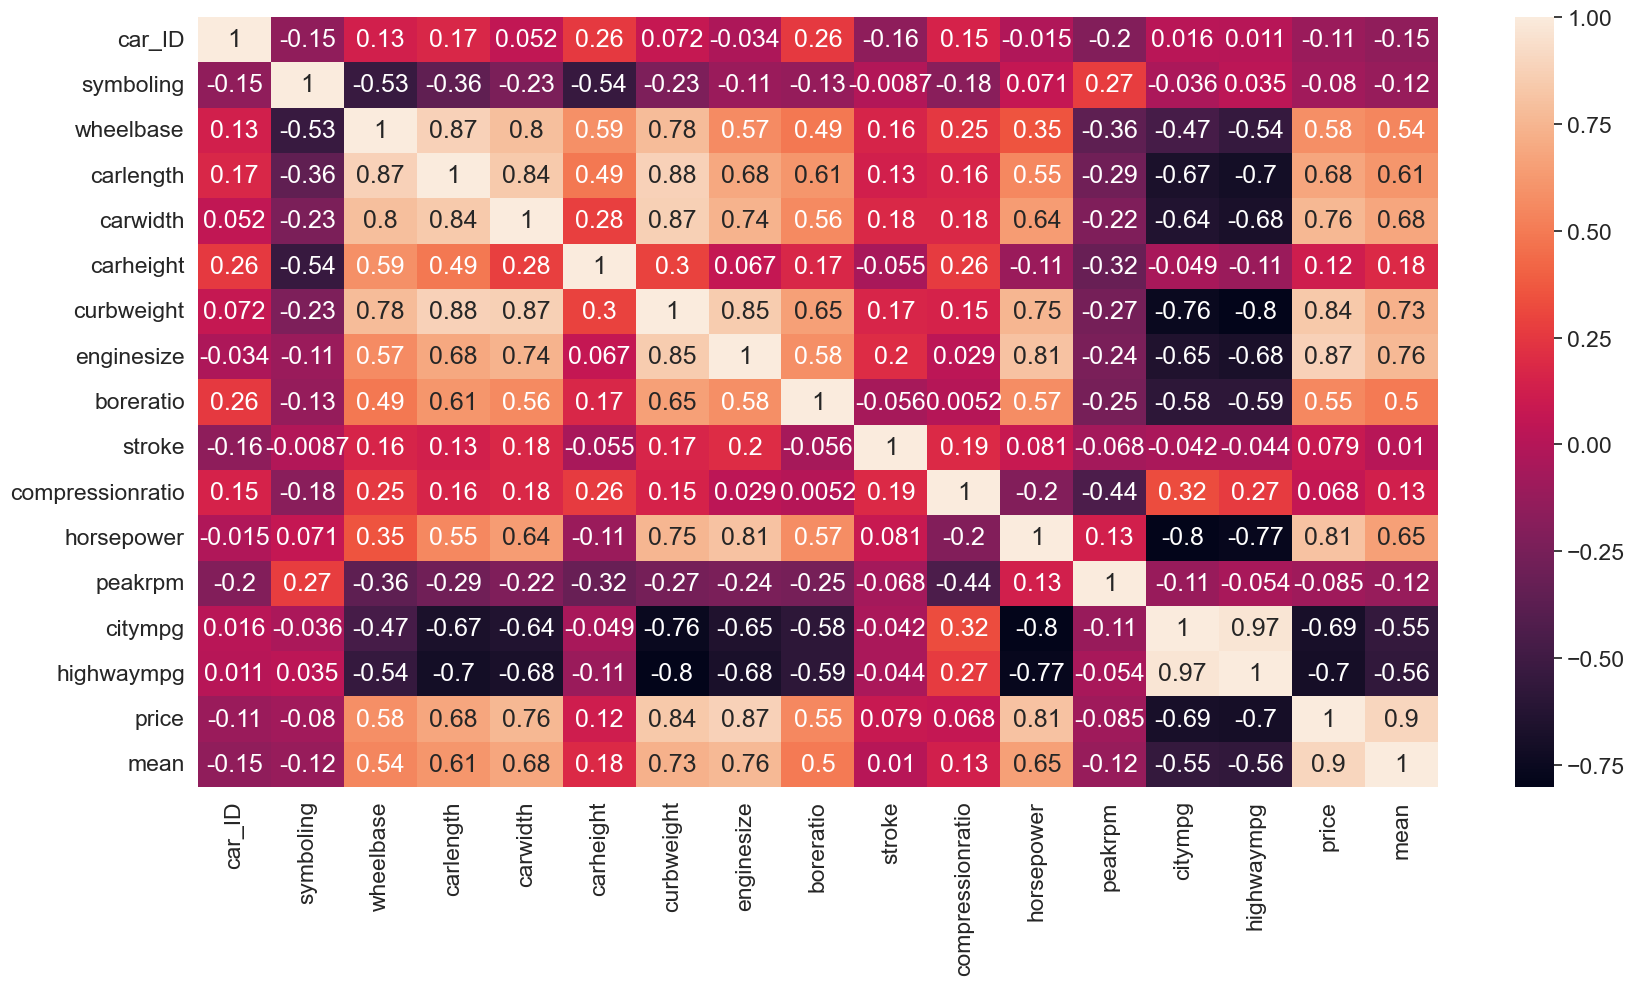

In [122]:

### using correlation to check the important variables
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [123]:
new_df = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price','CarsRange']]

In [124]:
## converting categorical variable into numbers 
new_df = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem","CarsRange"],data=new_df)

In [125]:
scaler = StandardScaler()

In [126]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'citympg','highwaympg']

new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [127]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,CarsRange_Budget,CarsRange_Medium,CarsRange_Highend
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [128]:
x = new_df.drop(columns=["price"])
y = new_df["price"]

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [134]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [139]:
x_train_pred = lr.predict(x_train)
x_test_pred = lr.predict(x_test)
train_score = r2_score(y_train,x_train_pred)*100
test_score = r2_score(y_test,x_test_pred)*100
train_score, test_score

(96.0384799952984, 88.40540860813918)

In [140]:
dt =DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [141]:
x_train_pred = dt.predict(x_train)
x_test_pred = dt.predict(x_test)
train_score = r2_score(y_train,x_train_pred)*100
test_score = r2_score(y_test,x_test_pred)*100
train_score, test_score

(99.86537119069865, 90.93891782816567)

In [143]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [144]:
x_train_pred = rf.predict(x_train)
x_test_pred = rf.predict(x_test)
train_score = r2_score(y_train,x_train_pred)*100
test_score = r2_score(y_test,x_test_pred)*100
train_score, test_score

(98.68612676365058, 95.70609816445513)

In [145]:
#####there are high chances decision tree is overfit. best results are given by randon forest

In [149]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [147]:
lr = Lasso(alpha=0.3, normalize=True)
lr.fit(x_train,y_train)


Lasso(alpha=0.3, normalize=True)

In [148]:
x_train_pred = lr.predict(x_train)
x_test_pred = lr.predict(x_test)
train_score = r2_score(y_train,x_train_pred)*100
test_score = r2_score(y_test,x_test_pred)*100
train_score, test_score

(96.02999454477295, 88.3085232194112)

In [150]:
rr = Ridge(alpha=0.3, normalize=True)
rr.fit(x_train,y_train)

Ridge(alpha=0.3, normalize=True)

In [151]:
x_train_pred = rr.predict(x_train)
x_test_pred = rr.predict(x_test)
train_score = r2_score(y_train,x_train_pred)*100
test_score = r2_score(y_test,x_test_pred)*100
train_score, test_score

(94.01147339805951, 88.10989758528578)